In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [44]:
merged_df = pd.read_csv('../../data/education/education_data.csv')
merged_df['지역별'] = merged_df['지역별'].replace({'서울특별시': '서울', '부산광역시': '부산', '대구광역시': '대구',
                               '인천광역시': '인천', '광주광역시': '광주', '대전광역시': '대전', '울산광역시': '울산',
                               '세종특별자치시': '세종', '경기도': '경기', '강원특별자치도': '강원',
                               '충청북도': '충북', '충청남도': '충남', '전북특별자치도': '전북',
                               '전라남도': '전남', '경상북도': '경북', '경상남도': '경남', '제주특별자치도': '제주'})
merged_df = merged_df.sort_values(by='지역별')
# merged_df.head(), merged_df.shape, merged_df['지역별'].unique()

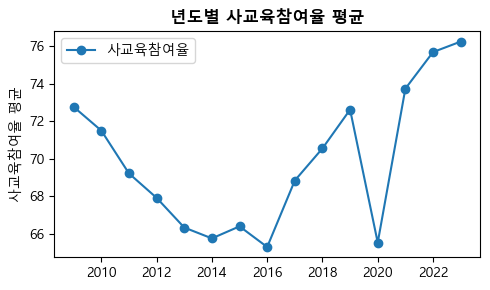

In [45]:
# 년도별 사교육참여율 시각화
numeric_columns = ['사교육참여율']

for col in numeric_columns:
    non_numeric = merged_df[col].apply(lambda x: isinstance(x, str))
    if non_numeric.any():
        print(f"Non-numeric values in {col}:")
        print(merged_df[non_numeric][col])

for col in numeric_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

merged_df.dropna(subset=numeric_columns, inplace=True)
average_data = merged_df.groupby('시점')[numeric_columns].mean().reset_index()

plt.figure(figsize=(5, 3))
plt.plot(average_data['시점'], average_data['사교육참여율'], label='사교육참여율', marker='o')

plt.title('년도별 사교육참여율 평균', fontweight='bold')
plt.ylabel('사교육참여율 평균')
plt.legend()

plt.tight_layout()
plt.show()

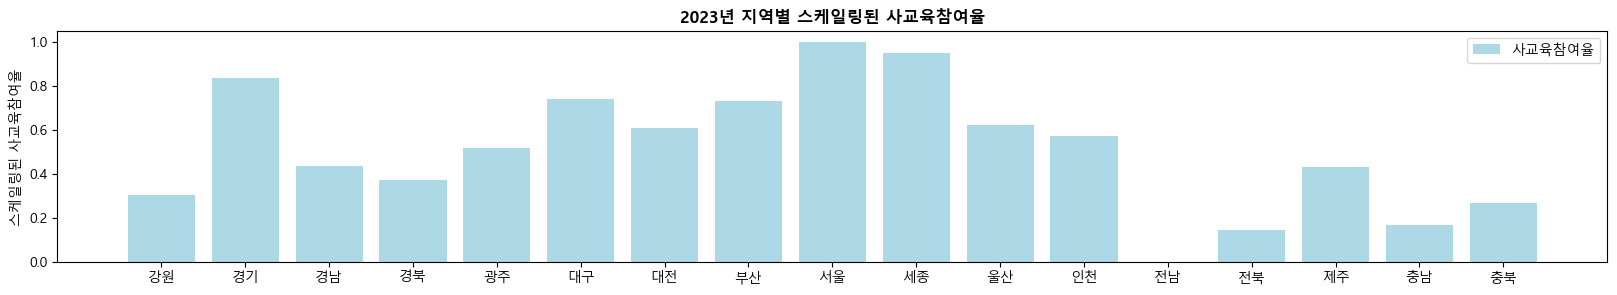

In [46]:
# 지역별 사교육참여율 시각화
data_2023 = merged_df[merged_df['시점'] == 2023].copy()

scaler = MinMaxScaler()
data_2023.loc[:, ['사교육참여율']] = scaler.fit_transform(data_2023[['사교육참여율']])
# print(data_2023[['지역별', '사교육참여율']])

fig, ax1 = plt.subplots(figsize=(20, 3))

ax1.bar(data_2023['지역별'], data_2023['사교육참여율'], color='lightblue', label='사교육참여율')
ax1.set_ylabel('스케일링된 사교육참여율')
ax1.tick_params(axis='y')

plt.title('2023년 지역별 스케일링된 사교육참여율', fontweight='bold')
ax1.legend(loc='upper right')

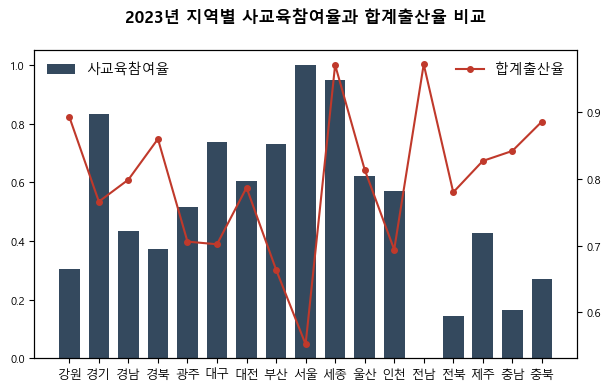

In [47]:
# 지역별 사설학원수 vs 합계출산율
data_2023['합계출산율'] = pd.to_numeric(data_2023['합계출산율'], errors='coerce')
fertility_data = data_2023.groupby('지역별')['합계출산율'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(7, 4))
# fig.patch.set_facecolor('#f0f0f0')
# ax1.set_facecolor('#f0f0f0')

bar_width = 0.7
ax1.bar(data_2023['지역별'], data_2023['사교육참여율'], width=bar_width, color=(52/255, 73/255, 94/255, 1.0), label='사교육참여율')
ax1.set_title('2023년 지역별 사교육참여율과 합계출산율 비교', pad=20, fontweight='bold')
ax1.tick_params(axis='y', labelsize=8)
ax1.set_xticks(range(len(data_2023['지역별'])))
ax1.set_xticklabels(data_2023['지역별'], fontsize=9)

ax2 = ax1.twinx()
ax2.plot(fertility_data['지역별'], fertility_data['합계출산율'], color=(192/255, 57/255, 43/255, 1.0), marker='o', markersize=4, label='합계출산율')
ax2.tick_params(axis='y', labelsize=8)

ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)

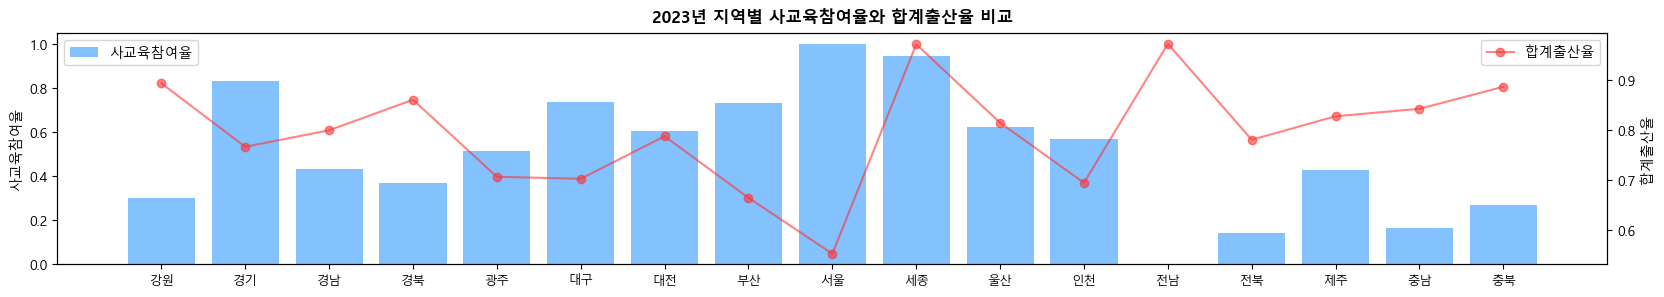

In [48]:
# 지역별 사설학원수 vs 합계출산율
data_2023['합계출산율'] = pd.to_numeric(data_2023['합계출산율'], errors='coerce')
fertility_data = data_2023.groupby('지역별')['합계출산율'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(20, 3))

ax1.bar(data_2023['지역별'], data_2023['사교육참여율'], color=(0.2, 0.6, 1.0, 0.6), label='사교육참여율')
ax1.set_ylabel('사교육참여율', fontsize=10)
ax1.set_title('2023년 지역별 사교육참여율와 합계출산율 비교', pad=8, fontweight='bold')
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xticks(range(len(data_2023['지역별'])))
ax1.set_xticklabels(data_2023['지역별'], fontsize=9)

ax2 = ax1.twinx()
ax2.plot(fertility_data['지역별'], fertility_data['합계출산율'], color=(1.0, 0.2, 0.2, 0.6), marker='o', label='합계출산율')
ax2.set_ylabel('합계출산율', fontsize=10)
ax2.tick_params(axis='y', labelsize=10)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

C:\Users\user\AppData\Local\Temp\ipykernel_9888\3373555923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['사교육참여율'] = pd.to_numeric(corr_df['사교육참여율'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_9888\3373555923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['합계출산율'] = pd.to_numeric(corr_df['합계출산율'], errors='coerce')


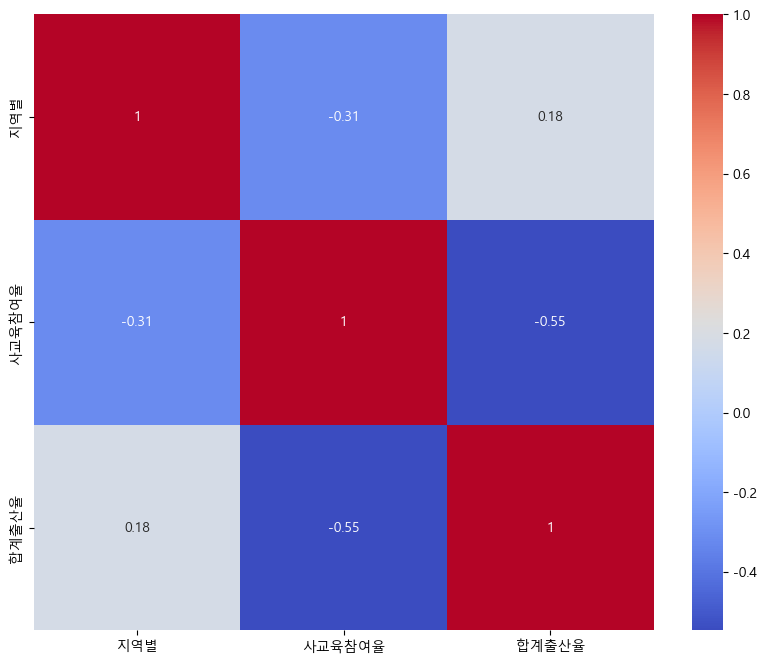

In [52]:
from sklearn.preprocessing import LabelEncoder

corr_df = merged_df[['지역별','사교육참여율','합계출산율']]
le_disaster = LabelEncoder()
corr_df.loc[:, '지역별'] = le_disaster.fit_transform(corr_df['지역별'])
corr_df['사교육참여율'] = pd.to_numeric(corr_df['사교육참여율'], errors='coerce')
corr_df['합계출산율'] = pd.to_numeric(corr_df['합계출산율'], errors='coerce')

corr_mat = corr_df.corr()

import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()